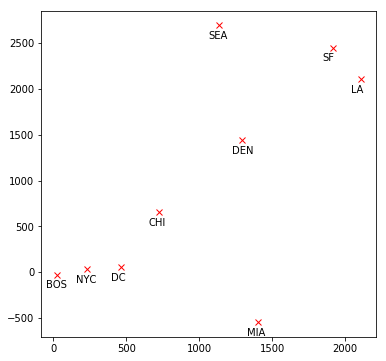

1. New D is:
[[   0  213  451 1471  975 2936 3115 2981 1938]
 [ 213    0  239 1305  792 2809 2947 2797 1763]
 [ 451  239    0 1106  653 2723 2801 2628 1614]
 [1471 1305 1106    0 1373 3246 3037 2739 1984]
 [ 975  792  653 1373    0 2080 2156 2006  970]
 [2936 2809 2723 3246 2080    0  815 1138 1263]
 [3115 2947 2801 3037 2156  815    0  398 1187]
 [2981 2797 2628 2739 2006 1138  398    0 1053]
 [1938 1763 1614 1984  970 1263 1187 1053    0]]
2. The discrepancy is: 56374.0880026033
As can be seen, the estimated positions of these cities seem to have nearly same relative position as the actual geographical locations. However, they are still not the exact relative distance as shown in the matrix, which is because of the rough distance data given, and maybe the difference between a plane (the way we assume the question) and a spherical surface (actual situation)


In [3]:
import numpy
import random
import matplotlib.pyplot as plt

def initial_embbed():
    D=numpy.array([[0,206,429,1504,963,2976,3095,2979,1949],[206,0,233,1308,802,2815,2934,2786,1771],[429,233,0,1075,671,2684,2799,2631,1616],[1504,1308,1075,0,1329,3273,3053,2687,2037],[963,802,671,1329,0,2013,2142,2054,996],[2976,2815,2684,3273,2013,0,808,1131,1307],[3095,2934,2799,3053,2142,808,0,379,1235],[2979,2786,2631,2687,2054,1131,379,0,1059],[1949,1771,1616,2037,996,1307,1235,1059,0]])
    Position=numpy.zeros((9,2))
    Position[1][0]=D[1][0]
    for i in range(2,9):
        R=D[i][0]
        curr_edf=999999999999999
        for j in range(500):
            theta=2*numpy.pi*random.random()
            lat=numpy.sin(theta)*R
            lon=numpy.cos(theta)*R
            temp_position=Position[:i+1].copy()
            temp_position[i]=(lat,lon)
            temp_edf=discrepancy(temp_position)
            if temp_edf < curr_edf:
                curr_edf=temp_edf
                Position[i]=(lat,lon)
    return Position

def one_step_optimization(position):
    D=numpy.array([[0,206,429,1504,963,2976,3095,2979,1949],[206,0,233,1308,802,2815,2934,2786,1771],[429,233,0,1075,671,2684,2799,2631,1616],[1504,1308,1075,0,1329,3273,3053,2687,2037],[963,802,671,1329,0,2013,2142,2054,996],[2976,2815,2684,3273,2013,0,808,1131,1307],[3095,2934,2799,3053,2142,808,0,379,1235],[2979,2786,2631,2687,2054,1131,379,0,1059],[1949,1771,1616,2037,996,1307,1235,1059,0]])
    gradient=numpy.zeros((9,2))
    for i in range(9):
        for j in range(2):
            derivative=0
            for k in range(9):
                if k!=i:
                    derivative+=2*(numpy.linalg.norm(position[i]-position[k])-D[i][k])*(1/numpy.linalg.norm(position[i]-position[k]))*(position[i][j]-position[k][j])
            gradient[i][j]=-derivative
    return gradient/10

def discrepancy(position):
    D=numpy.array([[0,206,429,1504,963,2976,3095,2979,1949],[206,0,233,1308,802,2815,2934,2786,1771],[429,233,0,1075,671,2684,2799,2631,1616],[1504,1308,1075,0,1329,3273,3053,2687,2037],[963,802,671,1329,0,2013,2142,2054,996],[2976,2815,2684,3273,2013,0,808,1131,1307],[3095,2934,2799,3053,2142,808,0,379,1235],[2979,2786,2631,2687,2054,1131,379,0,1059],[1949,1771,1616,2037,996,1307,1235,1059,0]])
    num=position.shape[0]
    value=0
    for i in range(num):
        for j in range(num):
            value=value+(numpy.linalg.norm(position[i]-position[j])-D[i][j])**2
    return value

def FindD(Position):
    new_D=numpy.zeros((9,9),dtype="uint16")
    for i in range(9):
        for j in range(9):
            new_D[i][j]=numpy.linalg.norm(Position[i]-Position[j])
    return new_D

if __name__ == "__main__":
    cities=['BOS','NYC','DC','MIA','CHI','SEA','SF','LA','DEN']
    position=initial_embbed()
    for i in range(500):
        position=position+one_step_optimization(position)
    plt.figure(figsize=(6,6))
    plt.plot(position[:,0],position[:,1],'rx')
    for i in range(9):
        plt.annotate(cities[i], xy=position[i], xytext=(position[i][0]-70,position[i][1]-150))
    plt.show()
    print('1. New D is:')
    print(FindD(position))
    print('2. The discrepancy is:',discrepancy(position))
    print('As can be seen, the estimated positions of these cities seem to have nearly same relative position as the actual geographical locations. However, they are still not the exact relative distance as shown in the matrix, which is because of the rough distance data given, and maybe the difference between a plane (the way we assume the question) and a spherical surface (actual situation)')